# Payments 2016

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [15, 10]

In [3]:
# importing the data set with FECHA_PAGO as index, parse_date means we are using pandas' datetime function, dayfirst adjusts for European date format
df = pd.read_csv('auto_debt.csv', sep=',', encoding='utf-8', index_col='FECHA_PAGO', parse_dates=True, dayfirst=True)
df.head()

,MCC_OBN_ID,MCC_TIPO_MOVIMIENTO,MCC_IMPORTE,MCC_FECHA_BAJA,MCC_TIPO_ORIGEN,MCC_CCC_ID,MCC_FECHA_MOVIMIENTO,OBN_PERIODO,OBN_CUOTA,OBN_TIPO_OBJETO_ID,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
FECHA_PAGO,,,,,,,,,,,,,,,,,,,,,
1900-01-01,20130000000017031068,C,21.00,01/01/1900,SEL,010,17/09/2014,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-11,20130000000017880233,D,0.02,01/01/1900,PAO,030,11/04/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-12,20130000000017262878,D,66.31,01/01/1900,PAO,130,12/11/2015,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-24,20130000000021722038,C,19.02,01/01/1900,MAJ,507,17/09/2014,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-01-01,20130000000016110860,D,21.84,01/01/1900,NULO,600,14/05/2014,2014.0,0.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# put the dates in order
df = df.sort_values('FECHA_PAGO')

In [5]:
# add a new column called "Period" with the year-month format
df['Period'] = df.index.to_period(freq='M')
df.head()

,MCC_OBN_ID,MCC_TIPO_MOVIMIENTO,MCC_IMPORTE,MCC_FECHA_BAJA,MCC_TIPO_ORIGEN,MCC_CCC_ID,MCC_FECHA_MOVIMIENTO,OBN_PERIODO,OBN_CUOTA,OBN_TIPO_OBJETO_ID,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Period
FECHA_PAGO,,,,,,,,,,,,,,,,,,,,,
1900-01-01,20130000000017031068,C,21.0,01/01/1900,SEL,010,17/09/2014,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01
1900-01-01,20130000000013383180,C,21.0,01/01/1900,SEL,010,14/05/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01
1900-01-01,20130000000013383180,D,21.0,01/01/1900,NULO,600,14/05/2014,2014.0,10.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01
1900-01-01,20130000000013307233,C,33.6,01/01/1900,SEL,010,17/09/2014,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01
1900-01-01,20130000000013307233,D,33.6,01/01/1900,NULO,600,17/09/2014,2014.0,20.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01


### Data wrangling: 

In [6]:
# We only want origen PAO
origen_df = df.groupby('MCC_TIPO_ORIGEN')
pao_df = origen_df.get_group('PAO')
# We only want tipo C (credito)
pao_tipo = pao_df.groupby('MCC_TIPO_MOVIMIENTO')
clean_df = pao_tipo.get_group('C')

# All transactions - 2016

In [7]:
# Totals (all cuotas combined)
clean_df.MCC_IMPORTE['Jan-2016':'Dec-2016']

FECHA_PAGO
2016-01-11       51.37
2016-01-11       68.96
2016-01-11      143.37
2016-01-11      122.89
2016-01-12       11.13
2016-01-12       23.10
2016-03-22       41.65
2016-03-22       61.43
2016-04-29    13748.70
2016-04-29    10525.90
2016-04-29    21051.80
2016-04-29    23303.00
2016-04-29    10525.90
2016-04-29    27497.40
2016-04-29    13748.70
2016-04-29    19973.80
2016-05-11       35.56
2016-05-11      240.53
2016-05-11      362.25
2016-06-16       35.66
2016-06-16       27.24
2016-07-10      360.00
2016-07-10      215.64
2016-07-20       34.30
2016-08-11       30.80
2016-08-11       25.26
2016-08-26     1417.85
2016-08-26     2835.70
2016-08-26     2407.65
2016-08-26     1880.20
                ...   
2016-12-14       27.75
2016-12-21      434.66
2016-12-21       79.84
2016-12-21       60.22
2016-12-21       78.26
2016-12-21       43.90
2016-12-21      143.06
2016-12-21      217.33
2016-12-21       39.13
2016-12-21       21.95
2016-12-21      143.06
2016-12-21       41.93


# BY CUOTA

In [8]:
cuota_group = clean_df.groupby('OBN_CUOTA')

## Cuota 0 - not data for 2016

## Cuota 10

In [12]:
grupo_ten = cuota_group.get_group(10.0)
ten_graph = grupo_ten.MCC_IMPORTE['Jan-2016':'Dec-2016']

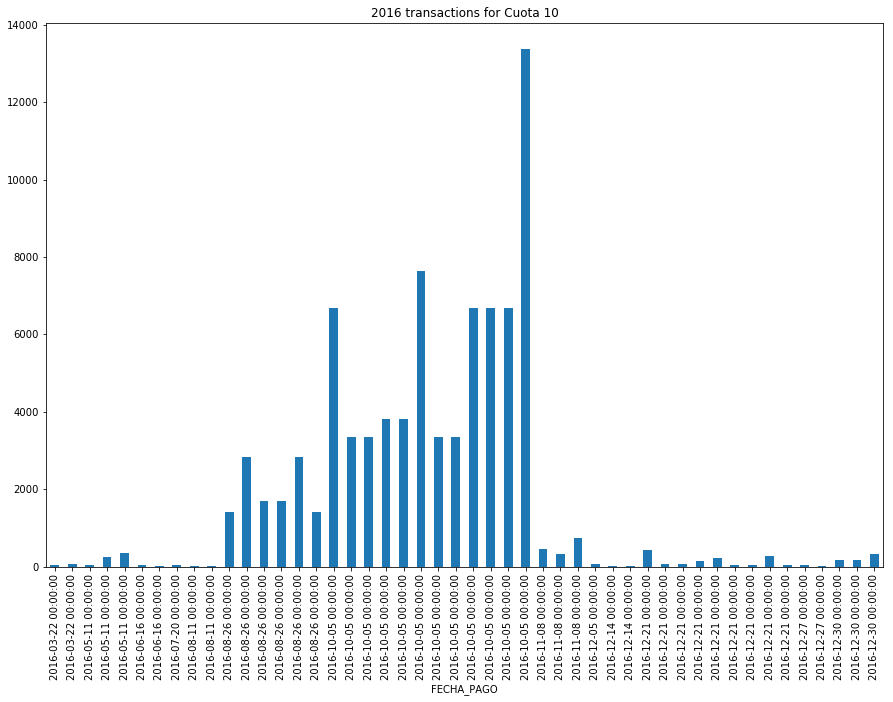

In [21]:
ten_graph.plot(kind='bar', title='2016 transactions for Cuota 10',)

## Cuota 20

In [14]:
grupo_twenty = cuota_group.get_group(20.0)
twenty_graph = grupo_twenty.MCC_IMPORTE['Jan-2016':'Dec-2016']

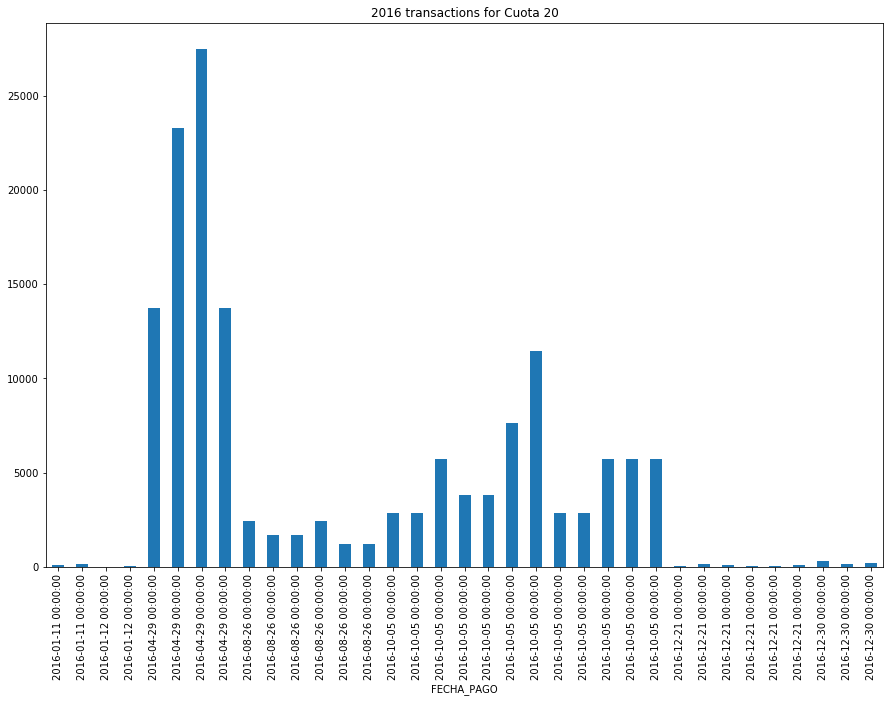

In [18]:
twenty_graph.plot(kind='bar', title='2016 transactions for Cuota 20')

## Cuota 50

In [16]:
grupo_fifty = cuota_group.get_group(50.0)
fifty_graph = grupo_fifty.MCC_IMPORTE['Jan-2016':'Dec-2016']

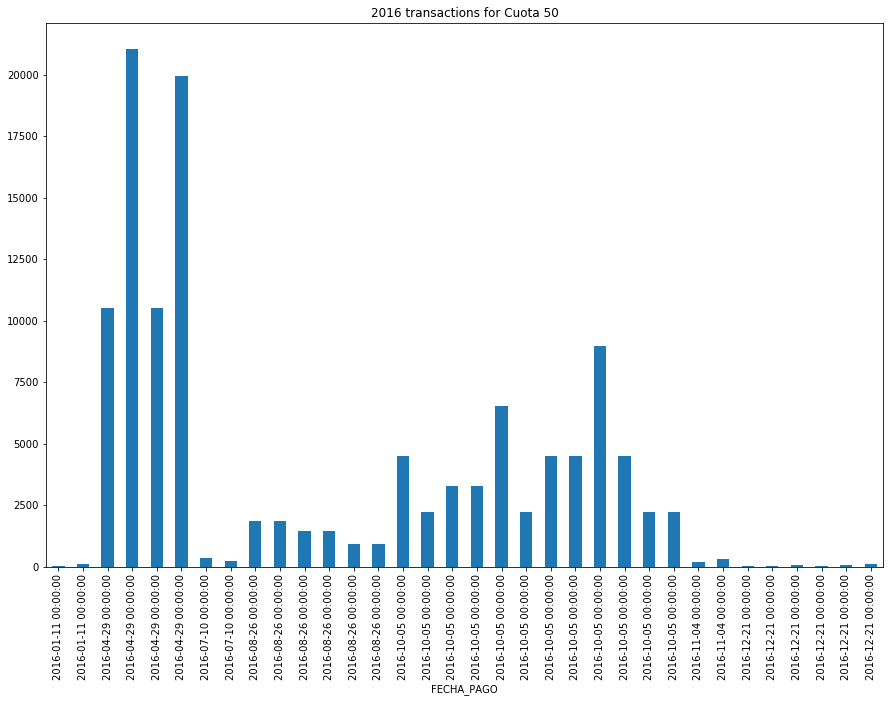

In [19]:
fifty_graph.plot(kind='bar', title='2016 transactions for Cuota 50')

## Cuota 51 - not data for 2016

## Cuota 90 - not data for 2016